In [1]:
# tools
import pandas as pd
import matplotlib.pyplot as plt

# data
from neuralforecast.utils import AirPassengersDF

# forecast
from neuralforecast.core import NeuralForecast

# models
from neuralforecast.auto import AutoMLP
from neuralforecast.models import NBEATS, NHITS

# hyperparams optim
from ray import tune

import warnings
warnings.filterwarnings("ignore")

# data

In [3]:
Y_df = AirPassengersDF
Y_df = Y_df.reset_index(drop = True)
print(Y_df.head(), "\n")
print(Y_df.shape, "\n")
print(Y_df["unique_id"].value_counts())

   unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0 

(144, 3) 

unique_id
1.0    144
Name: count, dtype: int64


# model training

In [4]:
horizon = 12
models = [
    NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
    NHITS(input_size=2 * horizon, h=horizon, max_steps=50),
    # Ray tune explore config
    AutoMLP(
        config = dict(
            max_steps = 100, # Operates with steps not epochs
            input_size = tune.choice([3 * horizon]),
            learning_rate = tune.choice([1e-3])
        ),
        h = horizon,
        num_samples = 1, 
        cpus = 1
    )
]
nf = NeuralForecast(models = models, freq = "M")
nf.fit(df = Y_df)

(_train_tune pid=29136) D:\software\miniconda3\envs\ts\lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=29136)   return t

Epoch 91: 100%|██████████| 1/1 [00:00<00:00, 221.76it/s, v_num=0, train_loss_step=13.50, train_loss_epoch=13.50]


(_train_tune pid=29136) `Trainer.fit` stopped: `max_steps=100` reached.
2024-12-07 22:35:32,122	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to 'C:/Users/Administrator/ray_results/_train_tune_2024-12-07_22-35-18' in 0.0070s.
Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | Co

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 324.74it/s, v_num=0, train_loss_step=12.50, train_loss_epoch=12.90]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=29136) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 70.55it/s, v_num=0, train_loss_step=12.50, train_loss_epoch=12.90, valid_loss=15.60]
                                                                        
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 65.90it/s, v_num=0, train_loss_step=12.50, train_loss_epoch=12.50, valid_loss=15.60]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.


# model predicting

In [5]:
Y_hat_df = nf.predict().reset_index()
Y_hat_df

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

,unique_id,ds,NBEATS,NHITS,AutoMLP
0,1.0,1961-01-31,444.368103,450.529510,454.914154
1,1.0,1961-02-28,464.821472,468.269562,430.188354
2,1.0,1961-03-31,472.306366,478.337708,458.478607
3,1.0,1961-04-30,493.174072,509.043457,477.244476
4,1.0,1961-05-31,531.443726,562.544495,522.253052
5,1.0,1961-06-30,621.822571,595.196106,608.805603
6,1.0,1961-07-31,678.368225,658.282471,694.153198
7,1.0,1961-08-31,668.124023,658.865540,689.863464
8,1.0,1961-09-30,585.601257,598.597290,583.123596
9,1.0,1961-10-31,506.837067,565.858276,511.057098


<Figure size 1200x300 with 0 Axes>

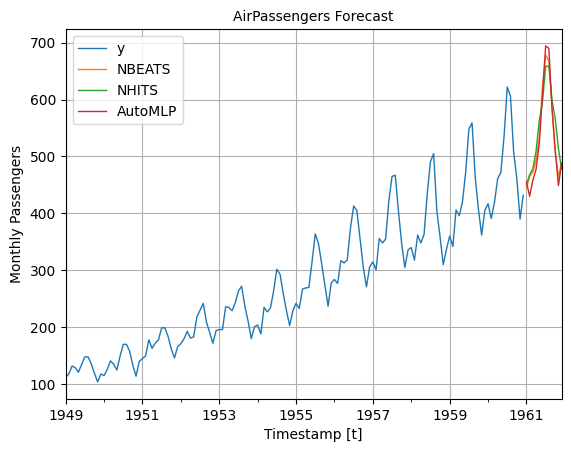

In [10]:
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds')

plt.figure(figsize = (12, 3))
plot_df[['y', 'NBEATS', 'NHITS', 'AutoMLP']].plot(linewidth=1.0)
plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
plt.axvline(plot_df.index[-horizon], color='r', linestyle='--', linewidth=1.0)
plt.legend(prop={'size': 10})
plt.grid()

# model save

In [7]:
nf.save(
    path = "./checkpoints/test_run/",
    model_index = None,
    overwrite = True,
    save_dataset = True,
)

# model load

In [8]:
nf2 = NeuralForecast.load(path = "./checkpoints/test_run/")
Y_hat_df = nf2.predict().reset_index()
Y_hat_df

Global seed set to 1
Global seed set to 1
Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

,unique_id,ds,AutoMLP,NBEATS,NHITS
0,1.0,1961-01-31,454.914154,444.368103,450.529510
1,1.0,1961-02-28,430.188354,464.821472,468.269562
2,1.0,1961-03-31,458.478607,472.306366,478.337708
3,1.0,1961-04-30,477.244476,493.174072,509.043457
4,1.0,1961-05-31,522.253052,531.443726,562.544495
5,1.0,1961-06-30,608.805603,621.822571,595.196106
6,1.0,1961-07-31,694.153198,678.368225,658.282471
7,1.0,1961-08-31,689.863464,668.124023,658.865540
8,1.0,1961-09-30,583.123596,585.601257,598.597290
9,1.0,1961-10-31,511.057098,506.837067,565.858276


<Figure size 1500x500 with 0 Axes>

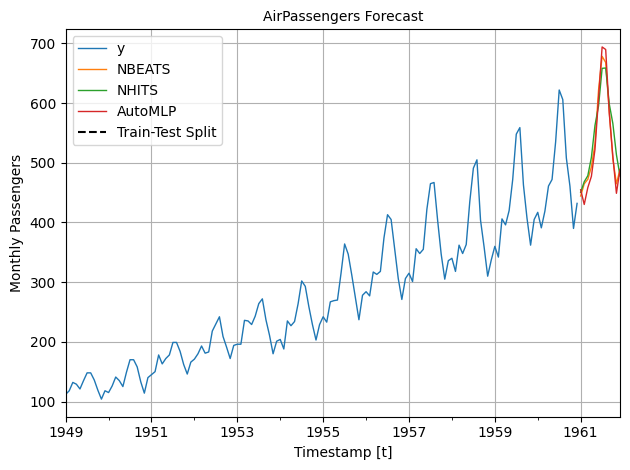

In [25]:
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds')

plt.figure(figsize = (15, 5))
plot_df[['y', 'NBEATS', 'NHITS', 'AutoMLP']].plot(linewidth=1.0)
plt.axvline(plot_df.index[-horizon], color='black', linestyle='--', label='Train-Test Split')
plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.grid()